In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df=pd.read_csv("used_phone.csv")

In [42]:
df.head()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,Samsung,Galaxy A55 5G,8,256,Like New,61,2,39999,17567
1,Oppo,OPPO A58 5G,6,128,Fair,69,1,13999,5216
2,OnePlus,OnePlus Nord N30 SE 5G,4,128,Like New,69,1,13999,7824
3,Redmi,POCO X5 Pro 5G,6,128,Fair,87,3,20999,7673
4,Realme,Realme Narzo 60x 5G,6,128,Fair,82,1,12999,5755


In [43]:
df.tail()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
4995,Motorola,Motorola Edge 30 Ultra,12,256,Fair,77,1,49999,20789
4996,OnePlus,OnePlus 10R 5G,8,128,Fair,55,4,32999,6533
4997,Vivo,Vivo Y16,3,64,Like New,88,3,8999,4989
4998,Redmi,Redmi A3,3,64,Good,76,2,6999,3191
4999,Apple,iPhone 15 Pro (512GB),8,512,Fair,84,2,149900,60439


In [44]:
df.shape

(5000, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           5000 non-null   object
 1   model           5000 non-null   object
 2   ram_gb          5000 non-null   int64 
 3   storage_gb      5000 non-null   int64 
 4   condition       5000 non-null   object
 5   battery_health  5000 non-null   int64 
 6   age_years       5000 non-null   int64 
 7   original_price  5000 non-null   int64 
 8   resale_price    5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [46]:
df.isnull().sum()

brand             0
model             0
ram_gb            0
storage_gb        0
condition         0
battery_health    0
age_years         0
original_price    0
resale_price      0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(99)

In [48]:
df=df.drop_duplicates()
df=df.reset_index(drop=True)

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df.shape

(4901, 9)

In [51]:
df.head()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,Samsung,Galaxy A55 5G,8,256,Like New,61,2,39999,17567
1,Oppo,OPPO A58 5G,6,128,Fair,69,1,13999,5216
2,OnePlus,OnePlus Nord N30 SE 5G,4,128,Like New,69,1,13999,7824
3,Redmi,POCO X5 Pro 5G,6,128,Fair,87,3,20999,7673
4,Realme,Realme Narzo 60x 5G,6,128,Fair,82,1,12999,5755


In [52]:
from sklearn.preprocessing import LabelEncoder


In [53]:
le_brand=LabelEncoder()
le_model=LabelEncoder()
le_condition=LabelEncoder()

In [54]:
df['brand']=le_brand.fit_transform(df['brand'])

In [55]:
df['brand']

0       7
1       4
2       3
3       6
4       5
       ..
4896    2
4897    3
4898    8
4899    6
4900    0
Name: brand, Length: 4901, dtype: int64

In [56]:
df['model']=le_brand.fit_transform(df['model'])

In [57]:
df['condition']=le_brand.fit_transform(df['condition'])

In [58]:
df.head()

,brand,model,ram_gb,storage_gb,condition,battery_health,age_years,original_price,resale_price
0,7,8,8,256,2,61,2,39999,17567
1,4,54,6,128,0,69,1,13999,5216
2,3,79,4,128,2,69,1,13999,7824
3,6,84,6,128,0,87,3,20999,7673
4,5,103,6,128,0,82,1,12999,5755


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4901 entries, 0 to 4900
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   brand           4901 non-null   int64
 1   model           4901 non-null   int64
 2   ram_gb          4901 non-null   int64
 3   storage_gb      4901 non-null   int64
 4   condition       4901 non-null   int64
 5   battery_health  4901 non-null   int64
 6   age_years       4901 non-null   int64
 7   original_price  4901 non-null   int64
 8   resale_price    4901 non-null   int64
dtypes: int64(9)
memory usage: 344.7 KB


In [60]:
X=df.drop(columns='resale_price')
y=df['resale_price']

In [61]:
print(X.columns)

Index(['brand', 'model', 'ram_gb', 'storage_gb', 'condition', 'battery_health',
       'age_years', 'original_price'],
      dtype='object')


In [62]:
print(y.name)

resale_price


#TRAIN TEST SPLIT

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [66]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_pred=model.predict(X_test)

In [68]:
from sklearn.metrics import r2_score

In [69]:
print("score of model",r2_score(y_pred,y_test))

score of model 0.9865101073189715


#graphical views

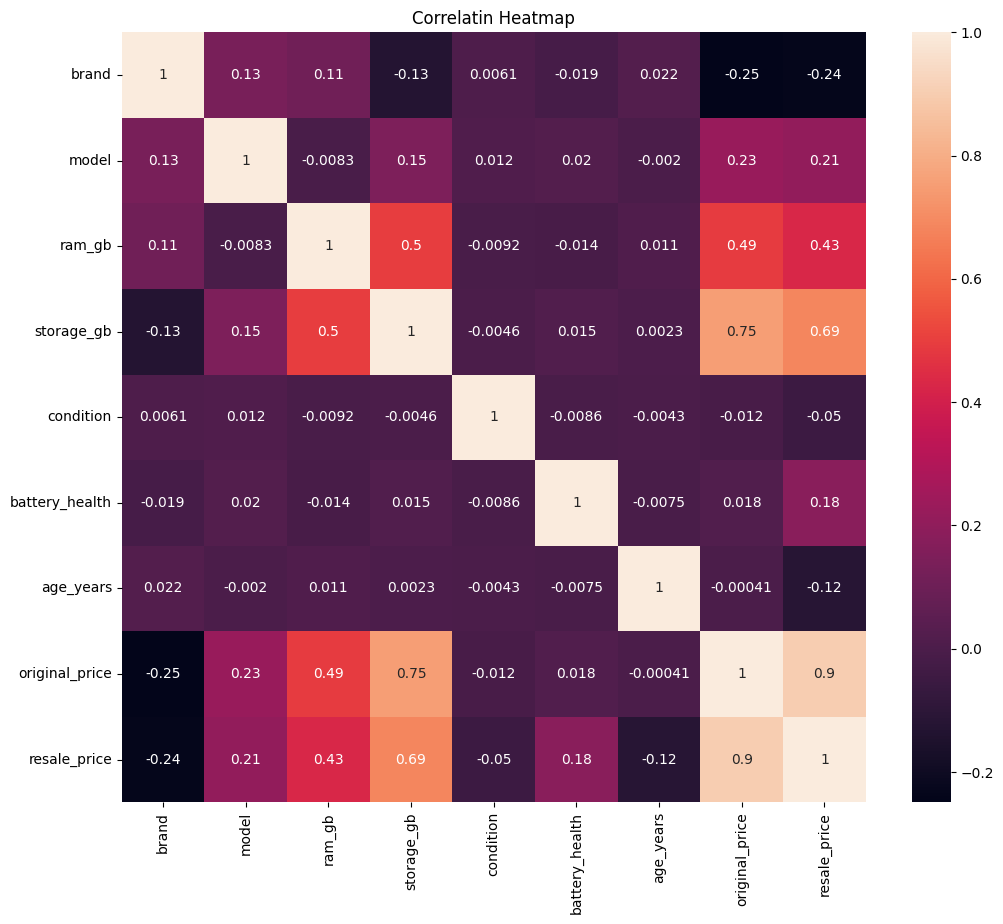

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlatin Heatmap")
plt.show()

In [74]:
import pickle
with open("EDA&FEpkl","wb") as f:
    pickle.dump(model,f)
            